In [7]:
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.exp import epsilon_bandit
from infomercial.local_gym import bandit
from infomercial.exp.epsilon_bandit import load_checkpoint
import gym

In [10]:
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.exp import meta_bandit
from infomercial.exp import epsilon_bandit
from infomercial.local_gym import bandit
from infomercial.exp.meta_bandit import load_checkpoint
import gym

from pprint import pprint

def plot_epsilon(env_name, result):
    """Plots!"""
    
    # episodes, actions, scores_E, scores_R, values_E, values_R, ties, policies
    episodes = result["episodes"]
    actions =result["actions"]
    bests =result["p_bests"]
    scores_R = result["scores_R"]
    values_R = result["values_R"]
    epsilons = result["epsilons"]
    regrets = result['regrets']
    # -
    env = gym.make(env_name)
    best = env.env.best
    print(f"Best arm: {best}, last arm: {actions[-1]}")

    # Plotz
    fig = plt.figure(figsize=(6, 14))
    grid = plt.GridSpec(6, 1, wspace=0.3, hspace=0.8)

    # Arm
    plt.subplot(grid[0, 0])
    plt.scatter(episodes, actions, color="black", alpha=.5, s=2, label="Bandit")
    plt.plot(episodes, np.repeat(best, np.max(episodes)+1), 
             color="red", alpha=0.8, ls='--', linewidth=2)
    plt.ylim(-.1, np.max(actions)+1.1)
    plt.ylabel("Arm choice")
    plt.xlabel("Episode")

    # score
    plt.subplot(grid[1, 0])
    plt.scatter(episodes, scores_R, color="grey", alpha=0.4, s=2, label="R")
    plt.ylabel("Score")
    plt.xlabel("Episode")
#     plt.semilogy()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    _ = sns.despine()

    # Q
    plt.subplot(grid[2, 0])
    plt.scatter(episodes, values_R, color="grey", alpha=0.4, s=2, label="$Q_R$")
    plt.ylabel("Value")
    plt.xlabel("Episode")
#     plt.semilogy()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    _ = sns.despine()

    # best
    plt.subplot(grid[3, 0])
    plt.scatter(episodes, bests, color="red", alpha=.5, s=2)
    plt.ylabel("p(best)")
    plt.xlabel("Episode")
    plt.ylim(0, 1)

    # Regret
    plt.subplot(grid[4, 0])
    plt.scatter(episodes, regrets, color="black", alpha=.5, s=2)
    plt.ylabel("Regret")
    plt.xlabel("Episode")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # ep
    plt.subplot(grid[5, 0])
    plt.scatter(episodes, epsilons, color="black", alpha=.5, s=2)
    plt.ylabel("$\epsilon_R$")
    plt.xlabel("Episode")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
def plot_critic(critic_name, env_name, result):
    # -
    env = gym.make(env_name)
    best = env.env.best
    
    # Data
    critic = result[critic_name]
    arms = list(critic.keys())
    values = list(critic.values())

    # Plotz
    fig = plt.figure(figsize=(8, 3))
    grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)

    # Arm
    plt.subplot(grid[0])
    plt.scatter(arms, values, color="black", alpha=.5, s=30)
    plt.plot([best]*10, np.linspace(min(values), max(values), 10), color="red", alpha=0.8, ls='--', linewidth=2)
    plt.ylabel("Value")
    plt.xlabel("Arm")

In [11]:
bandit

<module 'infomercial.local_gym.bandit' from '/Users/qualia/Code/infomercial/infomercial/local_gym/bandit.py'>

In [12]:
# environments = [
#     ['BanditOneHot2', 'v0', 1],
#     ['BanditOneHot10', 'v0', 1],
#     ['BanditOneHot121', 'v0', 1],
#     ['BanditOneHot1000', 'v0', 1],
#     ['BanditEvenOdds2', 'v0', 1],
#     ['BanditOneHigh2', 'v0', 1],
#     ['BanditOneHigh10', 'v0', 1],
#     ['BanditOneHigh121', 'v0', 1],
#     ['BanditOneHigh1000', 'v0', 1],
#     ['BanditHardAndSparse2', 'v0', 1],
#     ['BanditHardAndSparse10', 'v0', 1],
#     ['BanditHardAndSparse121', 'v0', 1],
#     ['BanditHardAndSparse1000', 'v0', 1],
#     ['BanditGaussian10', 'v0', 1],
# ]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Best arm: [7], last arm: 7


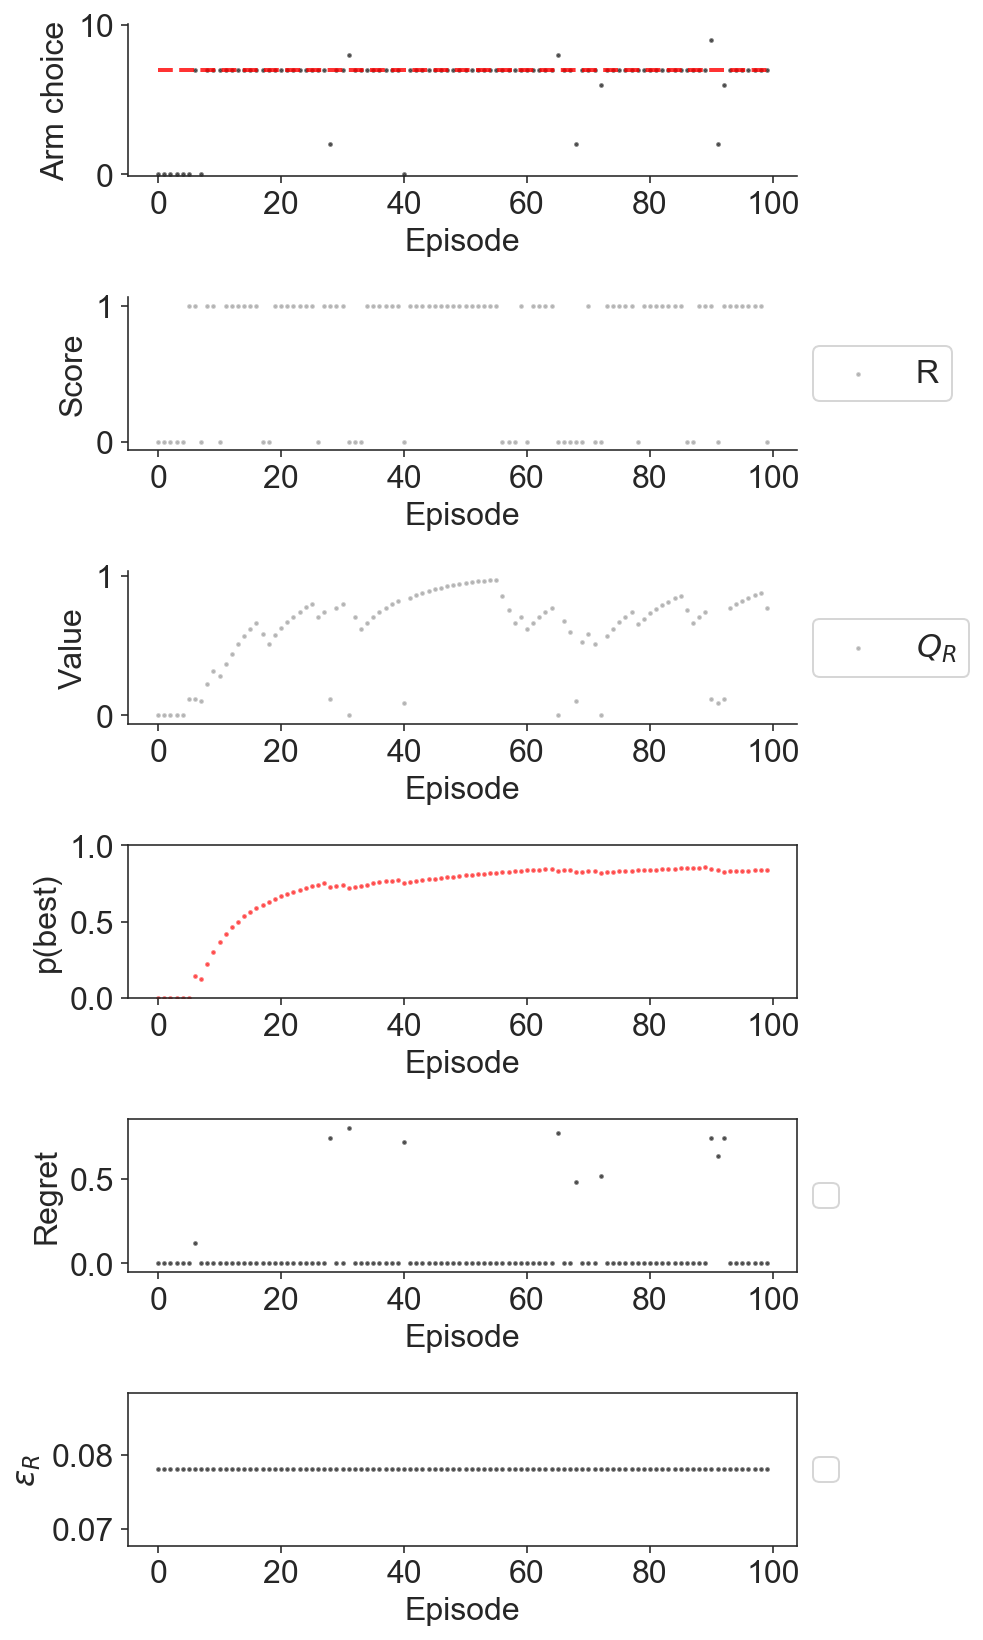

In [13]:
env_name = 'BanditOneHigh10-v0'

# Run bandit exps
result = epsilon_bandit(
    env_name=env_name,
    num_episodes=100, 
    lr_R=0.12, 
    epsilon=0.078,
    epsilon_decay_tau=0.000,
    seed_value=179,
)
plot_epsilon(env_name, result)

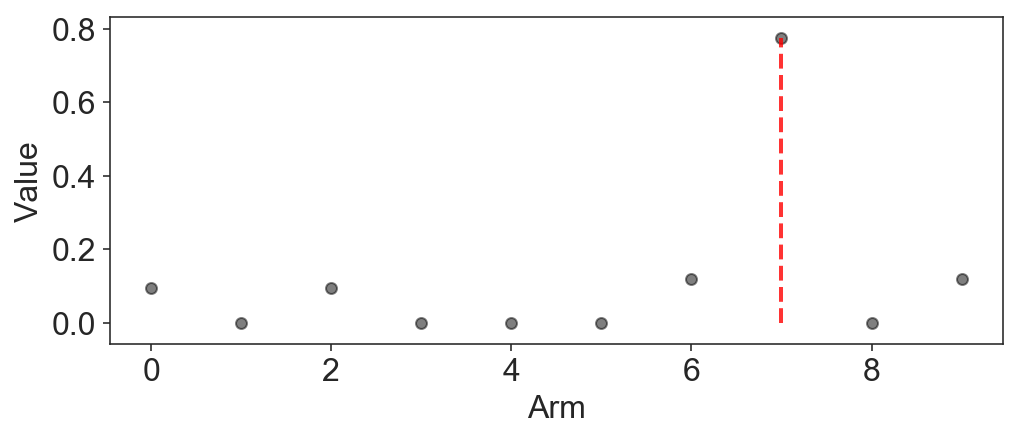

In [16]:
plot_critic('critic_R', env_name, result)